In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Future preduction
#to load dataset
df=pd.read_csv("Electric_Production.csv")  #dummy dataset
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
#how many rows and columns in given dataset   
df.shape

(397, 2)

In [4]:
#last five records
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [5]:
#to check null values in given dataset
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

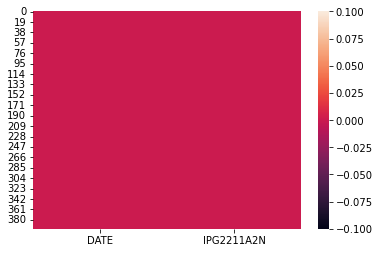

In [6]:
#visualise the null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#cross check
#to check the datatypes
df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [8]:
#to change the datatypes of date column from object type to datetime type
df['DATE']=pd.to_datetime(df['DATE'])
df.dtypes
#ns means nano seconds,unit of datetime

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [9]:
df.head()  #format of date:yyyy-mm-dd

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


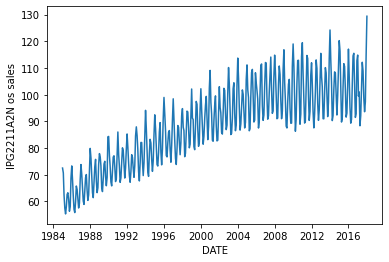

In [11]:
#plot given timeseries data
plt.plot(df['DATE'],df['IPG2211A2N'])
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N os sales')
plt.show()

In [13]:
#plot given timeseries data
#plt.plot(df['IPG2211A2N'])  #y output and x->index number
#plt.xlabel('DATE')
#plt.ylabel('IPG2211A2N of sales')
#plt.show()

In [14]:
#here given time series is 1. non-stationary
#2.trend occur:upward growth(trend)
#3.seasonality occur
#means mean and variance is different
#to see thar , it has trend as well as it has seasonality
'''Now it has trend that means it does not have a constant mean and it has 
seasonality so there are 2 factors which has this data is non-stationary.
so if this data is non-stationary we need to do something about it and what will
need to do we need to perform differencing '''

'Now it has trend that means it does not have a constant mean and it has \nseasonality so there are 2 factors which has this data is non-stationary.\nso if this data is non-stationary we need to do something about it and what will\nneed to do we need to perform differencing '

In [15]:
#given TS data is non-stationary so we need to perform differencing 
#Apply first differencing :use shift(1) or diff()
df_diff_1=df['IPG2211A2N']-df['IPG2211A2N'].shift(1)  #first order differencing
df_diff_1.head(10)

0       NaN
1   -1.8332
2   -8.2218
3   -4.9788
4   -2.1563
5    2.7753
6    4.5298
7    0.6283
8   -2.6639
9   -4.2692
Name: IPG2211A2N, dtype: float64

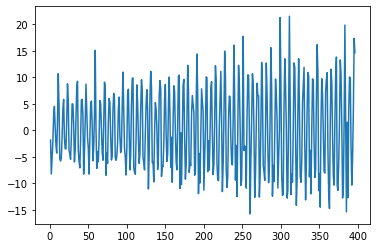

In [16]:
#check after first order differencing whether new TS df_diff1 is stationary bor non-stationary,first remove null rows:
#use inbuilt function: dropna()
plt.plot(df_diff_1.dropna())
plt.show()

In [ ]:
#after first order differencing trend is not occur but seasonality(means within year) occur

In [ ]:
#seasonality occur means within year:means 12 months periods:shift(12)

In [17]:
#in this above plot ,the trend component removed 
#but stil seasonality means stil the TS data is non-stationary .
#we are removing seasonality component , then we need perform diffrencing
#basis of seasonality . here we have dataset , season=12 month means 
#1 season=12 month 
#perform Seasonal difference means subtract original time series data from
#lag12 means shift(12)
df_seasonal_diff=df['IPG2211A2N']-df['IPG2211A2N'].shift(12)

In [19]:
df_seasonal_diff.head(20)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    0.8005
13   -2.6851
14   -0.2281
15   -0.4385
16    0.4986
17    1.8101
18    3.1453
19    1.2331
Name: IPG2211A2N, dtype: float64

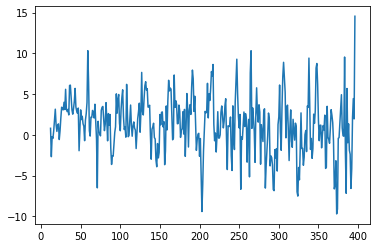

In [20]:
#plot new series
plt.plot(df_seasonal_diff.dropna())
plt.show()

In [21]:
#in above plot , the seasonality component removed . There are some up & downs 
#these are not seasonality , but these are just random error or white noise .
#here Seasonality has been removed but not satisfied still show some trend
#apply first order differencing  , means subtract df_seasonal_diff from
#lag1 of itself Time series seasonal_difference

In [22]:
df_1=df_seasonal_diff-df_seasonal_diff.shift(1)   #first order differencing
#apply on nwe ts de_seasonal_diff:after apply 12th differencing

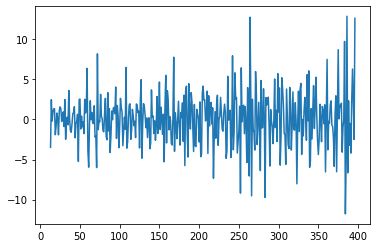

In [24]:
#plot new series
plt.plot(df_1.dropna())
plt.show()

In [ ]:
#Here mean:constant or 0 (zero) here mean is 0 
#no trend 
#no seasonality 
#here series:stationary 

#Now its look much better and much stable we can see there is a constant
#mean means here mean=0 . Here the trend has been removed and seasonality 
#has been removed .
#There are some white noise means random error show. 
#but this look much better.
#This is the concept of differencing which is the middle of ARIMA that is
#Integration

In [ ]:
#ARIMA model use in this time series data
#AR(p)I(d)MA(q)
#find the value of p with the help of PACF
#find the value of q with the help of ACF
#and d=1 because apply only first order differencing     

In [ ]:
#Identification of AR(p) and MA(q)
#pth order and qth order

In [25]:
#plot PACF
from statsmodels.graphics.tsaplots import plot_pacf

In [26]:
#draw pacf plot on stationary vtime series df_1
df_1=df_1.dropna()

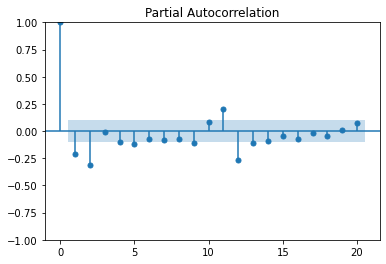

In [27]:
plot_pacf(df_1,lags=20)
plt.show()

In [ ]:
#here see pacf plot,order of p=2 means AR(p=2)

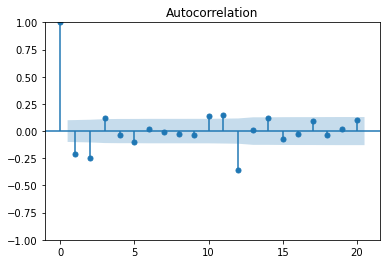

In [28]:
#Now we identity the order of MA(q) :decided on ACF means auto correlation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_1,lags=20)
plt.show()

In [ ]:
#here given series is stationary
#here see acf plot,order of q=3 means MA(q=3)

In [ ]:
#ARIMA (p=2,d=1,q=1)
#generalised equation

In [29]:
#SARIMAX or Seasonality ARIMAX
#it is special version of ARIMA
#call inbuilt class SARIMAX
import statsmodels.api as sm
#sm is a user defined alias name
#api:application programming interface

In [30]:
#create the object of class SARIMAX and passing the argument
model=sm.tsa.statespace.SARIMAX(df['IPG2211A2N'],order=(2,1,3),seasonal_order=(2,1,3,12),trend='c')
#oder(p,d,q)
#order=(p,d,q,seasonality means 12 months)
#trend can be either linear or exponential
#if trend is linear then pass 't' in trend parameter otherwise pass 'c' in 
#trend parameter

In [31]:
#train the model,use fit() method of SARIMAX
model=model.fit()

C:\Users\Shivani S Prajapati\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
df.shape

(397, 2)

In [36]:
397*70/100

277.9

In [34]:
#test the model ,using predict method of SARIMAX class
y_pred=model.predict(start=278,end=396)
y_pred

278    100.160070
279     91.417690
280     92.026226
281    100.283746
282    110.371441
          ...    
392     98.979061
393     90.373528
394     97.191198
395    111.770977
396    120.753283
Name: predicted_mean, Length: 119, dtype: float64

In [37]:
#to add new column forecast2 in existing dataframe df which hold the value of y_pred
df['forecast']=y_pred
df.head()

,DATE,IPG2211A2N,forecast
0,1985-01-01,72.5052,NaN
1,1985-02-01,70.6720,NaN
2,1985-03-01,62.4502,NaN
3,1985-04-01,57.4714,NaN
4,1985-05-01,55.3151,NaN


In [39]:
df.tail(10)

,DATE,IPG2211A2N,forecast
387,2017-04-01,88.3530,90.998147
388,2017-05-01,92.0805,90.963796
389,2017-06-01,102.1532,102.925109
390,2017-07-01,112.1538,112.448409
391,2017-08-01,108.9312,111.144782
392,2017-09-01,98.6154,98.979061
393,2017-10-01,93.6137,90.373528
394,2017-11-01,97.3359,97.191198
395,2017-12-01,114.7212,111.770977
396,2018-01-01,129.4048,120.753283


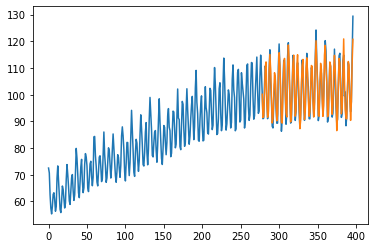

In [41]:
#plot:actual output and forecast2
plt.plot(df[['IPG2211A2N','forecast']])
plt.show()

In [44]:
y_test=df['IPG2211A2N']
y_test=y_test[278:397,]   #start=143 stop=204-1=203 
y_test

278    100.4386
279     90.9944
280     91.2348
281    103.9581
282    110.7631
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 119, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 7.9386277402473
R2 Score: 0.9152620436458241
